In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [3]:
with open("統計報告.csv") as f:
    df_data=pd.read_csv(f)
df_data.columns= ["Age","Sex","BMI","Children","Smoker","Region","Charge"]
df_data

,Age,Sex,BMI,Children,Smoker,Region,Charge
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
3,33,male,22.71,0,no,northwest,21984.4706
4,32,male,28.88,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [18]:
Sex_map = {'female':0,'male':1}
Smoker_map = {'yes':0,'no':1}
Region_map = {'southwest':0,"southeast":1,'northwest':2,"northeast":3}
df_data["isSex"] = df_data["Sex"].map(Sex_map)
df_data["isSmoker"] = df_data["Smoker"].map(Smoker_map)
df_data["isRegion"] = df_data["Region"].map(Region_map)

In [23]:
x = df_data.drop(labels=["Sex","Smoker","Region"],axis=1).values
print(len(np.where(np.isnan(x))[0]))

0


In [24]:
np.set_printoptions(suppress=True)

In [25]:
df_data.drop(labels=["Sex","Smoker","Region"],axis=1)

,Age,BMI,Children,Charge,isSex,isSmoker,isRegion
0,19,27.90,0,16884.9240,0,0,0
1,18,33.77,1,1725.5523,1,1,1
2,28,33.00,3,4449.4620,1,1,1
3,33,22.71,0,21984.4706,1,1,2
4,32,28.88,0,3866.8552,1,1,2
...,...,...,...,...,...,...,...
1333,50,30.97,3,10600.5483,1,1,2
1334,18,31.92,0,2205.9808,0,1,3
1335,18,36.85,0,1629.8335,0,1,1
1336,21,25.80,0,2007.9450,0,1,0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0. -0. -0. -0. -0. -0.]
StandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1. 1. 1. 1.]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'Charge'), Text(0.5, 1.0, 'Distribution of Charge')]

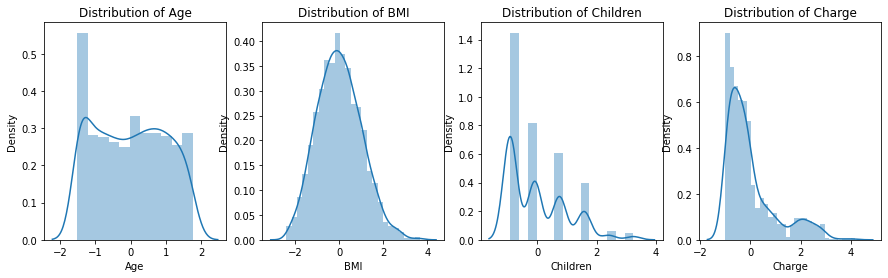

In [27]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='Age',title="Distribution of Age")
axis[1].set(xlabel='BMI',title="Distribution of BMI")
axis[2].set(xlabel='Children',title="Distribution of Children")
axis[3].set(xlabel='Charge',title="Distribution of Charge")


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


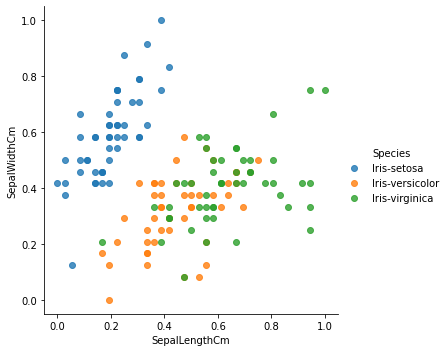

In [42]:
x_scaled = pd.DataFrame(x_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x_scaled["Species"]=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=x_scaled,fit_reg=False)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [0.4287037  0.43916667 0.46757062 0.45777778]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.22925036 0.18006108 0.29805579 0.31692192]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

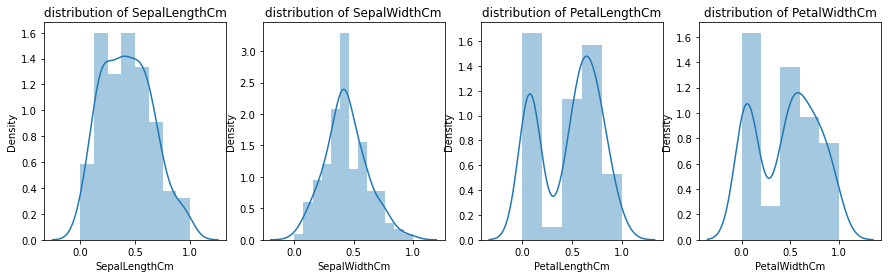

In [33]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")


In [ ]:
x_scaled = pd.DataFrame(x_scaled,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
x_scaled["Species"]=df_train["Species"]
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=x_scaled,fit_reg=False)

In [30]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [0.73966245 0.69409091 0.5447343  0.47946667]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.10446852 0.09821513 0.2548593  0.30424505]


C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

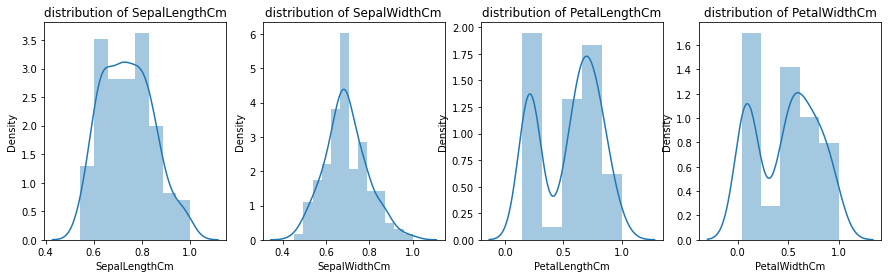

In [31]:
fig, axis = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(x_scaled[:,0],ax=axis[0])
sns.distplot(x_scaled[:,1],ax=axis[1])
sns.distplot(x_scaled[:,2],ax=axis[2])
sns.distplot(x_scaled[:,3],ax=axis[3])
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")


In [44]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(x)
x_scaled = scaler.transform(x)
print('StandardScaler 縮放過後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', x_scaled.std(axis=0))

StandardScaler 縮放過後資料集 X 的平均值 :  [ 0.03333333  0.108      -0.16895238 -0.06755556]
StandardScaler 縮放過後資料集 X 的標準差 :  [0.63484715 0.86429316 0.50243691 0.50707508]


TypeError: distplot() got an unexpected keyword argument 'axis'

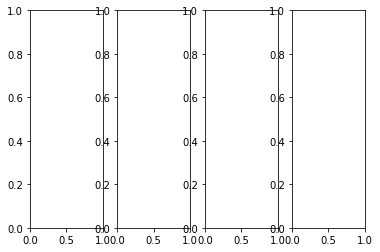

In [48]:
fig, axis = plt.subplots(nrows=1,ncols=4)
sns.distplot(x_scaled[:,0],ax=axis[0)
sns.distplot(x_scaled[:,1],ax=axis=1)
sns.distplot(x_scaled[:,2],ax=axis=2)
sns.distplot(x_scaled[:,3],ax=is=3)
axis[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axis[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axis[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axis[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")
